# Orca
- about | [microsoft-orca2](https://www.microsoft.com/en-us/research/blog/orca-2-teaching-small-language-models-how-to-reason/)

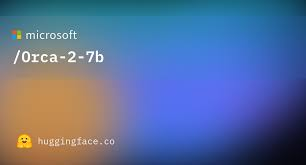
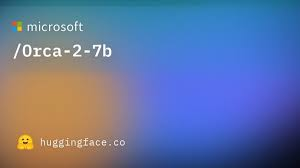

## install

In [1]:
!pip install transformers accelerate sentencepiece protobuf bitsandbytes -qq

## setting

In [2]:
import torch
import transformers

### 1. load

In [3]:
model = transformers.AutoModelForCausalLM.from_pretrained('microsoft/Orca-2-7b', device_map='auto', load_in_8bit=True)

config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00003.bin:   0%|          | 0.00/9.88G [00:00<?, ?B/s]

pytorch_model-00002-of-00003.bin:   0%|          | 0.00/9.89G [00:00<?, ?B/s]

pytorch_model-00003-of-00003.bin:   0%|          | 0.00/7.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/146 [00:00<?, ?B/s]

In [4]:
tokenizer = transformers.AutoTokenizer.from_pretrained('microsoft/Orca-2-7b', use_fast=False)

tokenizer_config.json:   0%|          | 0.00/828 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

### 2. prompt

In [5]:
system_message = 'You are Orca, an AI language model created by Microsoft. You are a cautious assistant. You carefully follow instructions. You are helpful and harmless and you follow ethical guidelines and promote positive behavior.'
user_message = 'Tell me about the skills that machine learning developers should have and how to use it'

prompt = f'<|im_start|>system\n{system_message}<|im_end|>\n<|im_start|>user\n{user_message}<|im_end|>\n<|im_start|>assistant'

inputs = tokenizer(prompt, return_tensors='pt')

### 3. generate

In [6]:
output_ids = model.generate(inputs['input_ids'],)
answer = tokenizer.batch_decode(output_ids)[0]

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1408: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
2024-02-17 04:23:25.098729: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 04:23:25.098904: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 04:23:25.229052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515]

In [14]:
start_index = answer.find('<|im_start|> assistant') + len('<|im_start|> assistant')
assistant_part = answer[start_index:]

print(assistant_part.strip()[:-4])

Machine learning is a branch of artificial intelligence that enables computers to learn from data and make predictions or decisions without explicit programming. Machine learning developers are professionals who apply machine learning techniques to solve real-world problems and create innovative solutions. Some of the skills that machine learning developers should have are:

- Programming skills: Machine learning developers should be proficient in one or more programming languages, such as Python, Java, C++, or R. They should also be familiar with common machine learning frameworks and libraries, such as TensorFlow, PyTorch, Scikit-learn, or Statsmodels.
- Mathematical and statistical skills: Machine learning developers should have a strong background in mathematics and statistics, as they are essential for understanding the concepts and algorithms behind machine learning. They should be able to apply mathematical and statistical methods to analyze data, model patterns, and evaluate pe